In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Загрузка файла в Google Collab

In [ ]:
uploaded = files.upload()

# Считывание CSV и формирование DataFrame

In [246]:
df = pd.read_csv('content/budgetary-indicators-of-moscow.csv', delimiter = ';', encoding="cp1251")
df

,Показатель,2018,2019,2020,2021,2022,2023,2024
0,NaN,факт,факт,факт,факт,план,план,план
1,Доходы,"2 376,60","2 630,90","2 869,00","3 335,60","3 261,50","3 444,00","3 637,00"
2,Расходы,"2 315,10","2 685,00","3 006,40","3 445,70","3 633,40","3 732,00","3 862,10"
3,в т.ч. обслуживание долга,"2,2","1,8","3,3","5,8","21,8","35,5","44,9"
4,Дефицит- / Профицит+,"61,5","-54,1","-137,4",-110,"-371,9",-288,"-225,1"


# Форматирование DataFrame для более удобного вида

In [247]:
df.columns = df.columns + "_" + df.iloc[0] 
df = df.drop(index=0)
df.columns.values[0] = 'Год'
df.set_index('Год', inplace=True)


In [248]:
new_df = df.T
new_df = new_df.map(lambda x: x.replace(' ', ''))
new_df = new_df.map(lambda x: x.replace(',', '.'))
new_df = new_df.apply(pd.to_numeric)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2018_факт to 2024_план
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Доходы                     7 non-null      float64
 1   Расходы                    7 non-null      float64
 2   в т.ч. обслуживание долга  7 non-null      float64
 3   Дефицит- / Профицит+       7 non-null      float64
dtypes: float64(4)
memory usage: 280.0+ bytes


In [249]:
new_df

Год,Доходы,Расходы,в т.ч. обслуживание долга,Дефицит- / Профицит+
2018_факт,2376.6,2315.1,2.2,61.5
2019_факт,2630.9,2685.0,1.8,-54.1
2020_факт,2869.0,3006.4,3.3,-137.4
2021_факт,3335.6,3445.7,5.8,-110.0
2022_план,3261.5,3633.4,21.8,-371.9
2023_план,3444.0,3732.0,35.5,-288.0
2024_план,3637.0,3862.1,44.9,-225.1


# Создание графиков

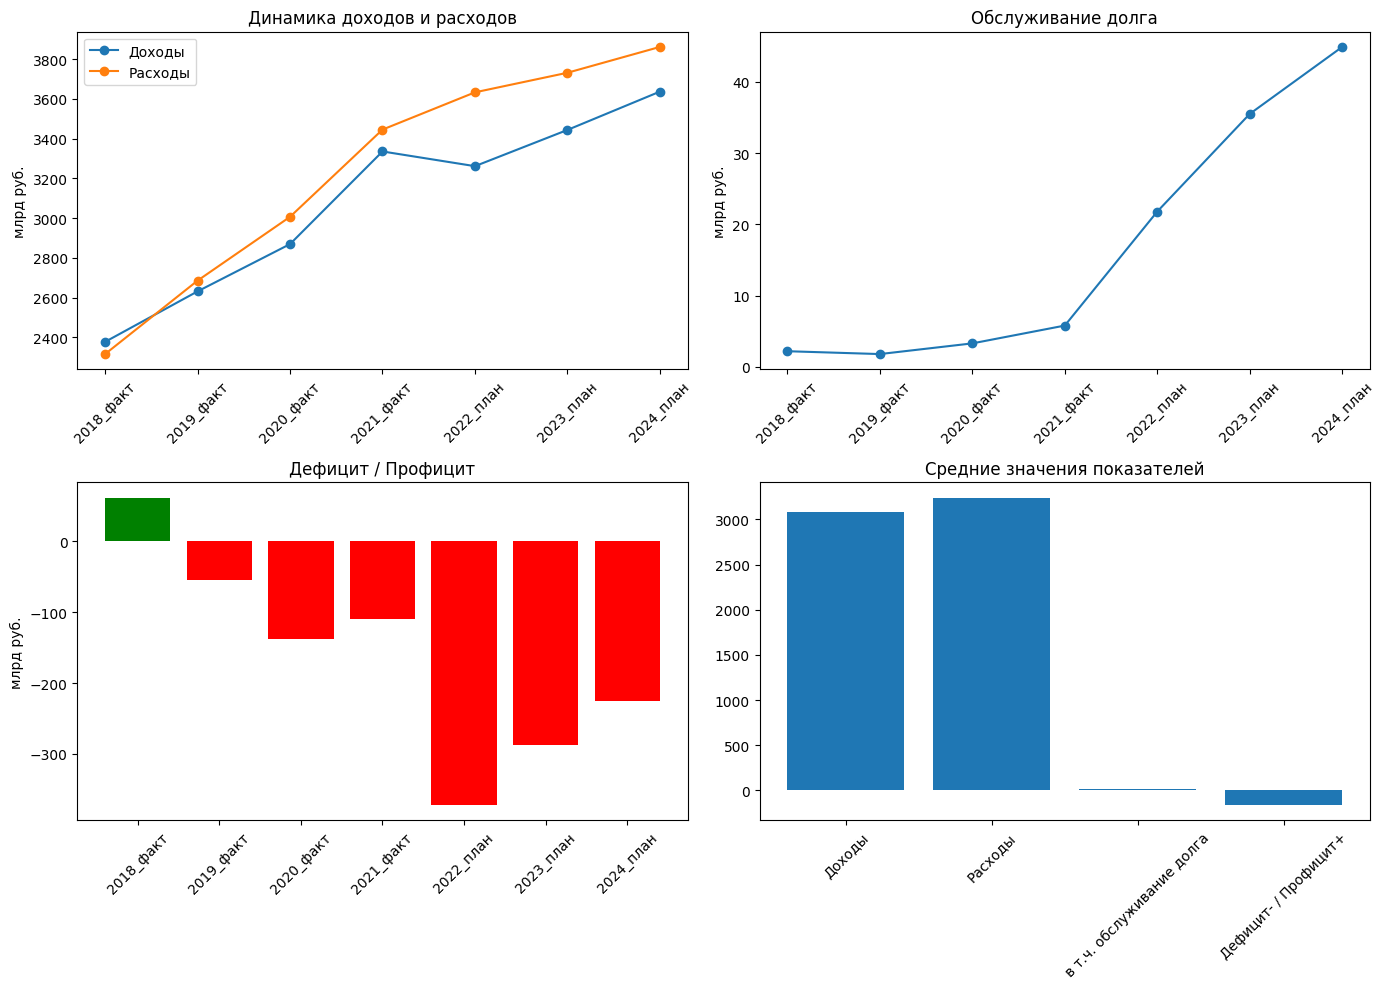

In [251]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax[0, 0].plot(new_df.index, new_df['Доходы'], marker='o')
ax[0, 0].plot(new_df.index,new_df['Расходы'], marker='o')
ax[0, 0].set_title('Динамика доходов и расходов')
ax[0, 0].set_ylabel('млрд руб.')
ax[0, 0].tick_params(axis='x', rotation=45)
ax[0, 0].legend(['Доходы', 'Расходы'])

ax[0, 1].plot(new_df.index,new_df['в т.ч. обслуживание долга'], marker='o')
ax[0, 1].set_title('Обслуживание долга')
ax[0, 1].set_ylabel('млрд руб.')
ax[0, 1].tick_params(axis='x', rotation=45)

ax[1, 0].bar(new_df.index,new_df['Дефицит- / Профицит+'], color=['r' if v < 0 else 'g' for v in new_df['Дефицит- / Профицит+']])
ax[1, 0].set_title('Дефицит / Профицит')
ax[1, 0].set_ylabel('млрд руб.')
ax[1, 0].tick_params(axis='x', rotation=45)

means = new_df[['Доходы', 'Расходы',
            'в т.ч. обслуживание долга',
            'Дефицит- / Профицит+']].mean()

ax[1, 1].bar(means.index, means.values)
ax[1, 1].set_title('Средние значения показателей')
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
